In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import pathlib as pl
import os 
import pandas as pd

# Metrics for Model Selection

In this notebook you will fit polynomials to data to decide which order of polynomial is the best fit. Unlike before, the data you will be using is 3 dimensional, meaning it isn't possible to plot. Instead, you will write functions to calculate various metrics that are used to determine model fit. 

Complete this notebook, then answer the questions that go along side it. 

In [2]:
# set random seed for reproducibility
seed = 2022
np.random.seed(seed)

## Load the data 

In [3]:
path_csv = pl.Path(os.getcwd()) / f'M6_Performance_Metrics_Data.csv'
with open(path_csv, 'rb') as file:
    data_pd = pd.read_csv(file)

In [4]:
print(data_pd.head())

   Unnamed: 0        x1        x2        x3          y
0           0  0.382303 -1.596593  1.233776   4.935364
1           1  1.902436  1.579109 -0.341741  25.138660
2           2 -1.689244  1.298489 -1.472081  -4.786340
3           3 -1.510509  1.937616 -1.600244  -3.185759
4           4  1.621717  0.515558 -1.869644  19.712731


## Section 1 : Split the data into training, validation and test sets

### TO DO: write a function that splits the data into traning, validation and test sets.

The function should take as inputs the dataframe and the percentage splits for each of training, validation and test. It should output 3 dataframes, one for each of the sets. 

In [5]:
## write your function here ##

from sklearn.model_selection import train_test_split

def split_dataframe(df, data_split):
  
   # Splits a dataframe into training, validation, and test sets.
    
   # Args:
   # - param df (pd.DataFrame): The DataFrame to split.
   # - param data_split: a list of the fraction of the data to be in each set of form 
   # [training_fraction, validation_fraction, test_fraction]. The fractions should all add up to 1.
   # Returns:
   # - train_df, val_df, test_df (pd.DataFrame): The split DataFrames.
   # The code checks that the sum of the fractions in data_split is approximately equal to 1. This is to ensure that the user hasn't made an error in specifying the split fractions.
    assert np.sum(data_split)-1 < 0.01
    
    train_df, temp_df = train_test_split(df, test_size=data_split[1] + data_split[2])
    val_df, test_df = train_test_split(temp_df, test_size=data_split[2] / (data_split[1] + data_split[2]))
    
    return train_df, val_df, test_df

    

### TO DO: Use your function to split the data so the training set has 40% of the data and the validation and test sets have 30% of the data each

In [6]:
#### write your code here ####

# split the data into training, validation and test sets

### TO DO ###
#define the percentage for split: 40% for training, 30%  for validation and 30% for test
data_split =[0.4,0.3,0.3]

#data = {'X':data_pd[["x1","x2","x3"]].values, 'Y':data_pd["y"].values}

training_df, validation_df, test_df = split_dataframe(data_pd, data_split)
#################
#print(type(training_df))
#print(training_df)
print(len(training_df))
print(len(validation_df))
print(len(test_df))

40
30
30


## Section 2: Write Metrics Functions 

### TO DO: Write the functions that calcluate the metrics you will use to evaluate the model fits

Write Functions that return:
- The mean absolute error
- The average error
- The mean absolute percentage error 
- The root mean squared error 
- The total sum of squared errors 

In [7]:
## write your code here ##

#The root mean squared error (RMSE)
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((np.array(y_pred) - np.array(y_true)) ** 2))

#The mean absolute error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(np.array(y_pred)- np.array(y_true)))

#The average error
def average_error(y_true, y_pred):
    return np.mean(np.array(y_pred) - np.array(y_true))

#The mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100


#The total sum of squared errors
def total_sum_of_squared_errors(y_true, y_pred):
    return np.sum((np.array(y_pred)- np.array(y_true)) ** 2)


## Section 3: Fit models to training data and calculate performance metric on validation sets

For polynomials of order 1, 2, 3, and 4, you will use fit_model to fit each each model. This function uses scikit-learn polynomial regression. 


### TODO: write function to convert dataframe into numpy arrays

The scikit-learn functions take numpy arrays as their inputs. Therefore before you can fit any data you need to write a function to turn a dataframe with columns [x1, x2, x3, y] into two numpy arrays: X and y. X should have dimensions (N, D), where N is the number of data points and D is the dimensionality of the data (in this case 3). y should have dimensions (N, ). 


In [8]:
def fit_model(X, y, order):
    """creates scikit-learn regression object and fits it to the X and y data"""
    """
    Fits a polynomial regression model for the given order.
    
    Parameters:
    - X: Input data
    - y: Target values
    - order: Polynomial order
    
    Returns:
    - model: Fitted model
     - poly: PolynomialFeatures object
    """
    poly = PolynomialFeatures(degree=order)
    model = Pipeline([('poly', poly),
                      ('linear', LinearRegression(fit_intercept=False))])
    model = model.fit(X, y)
    return model , poly

In [9]:
### write your function here ## 

def convert_to_numpy(df):

    X = df[['x1', 'x2', 'x3']].to_numpy()
    y = df[['y']].to_numpy()
    
    return X, y

### TO DO: For polynomials of order 1 to 6 inclusive: 
1. Fit a polynomial to the training data using the fit_model function 
2. Use model.predict(X) to get the model predictions on the validation set
3. Store the model in a dictionary of models where the keys indicate the order and the items are the models
4. Store the predictions in a seperate dictionary where the keys indicate the order and the items are numpy arrays of the predictions 

In [15]:
## write your code here ##

X_train, y_train = convert_to_numpy(training_df)
X_val, y_val = convert_to_numpy(validation_df)

# Store models and predictions
models = {}
predictions = {}

# For polynomial orders 1 to 6
for order in [1, 2, 3, 4, 5, 6]:
    model, poly = fit_model(X_train, y_train, order)
    models[order] = model
    #print(type(model))
    # Predict on validation set
    X_val_poly = poly.transform(X_val) # Use transform on poly, not model
    y_pred = model.predict(X_val)
    predictions[order] = y_pred


## Section 4: Calculate metrics for each of the models

Now we want to calculate the metrics for each of the models. 


### TODO: Use the dictionary of predictions you have to caluclate and record (could be in a dataframe, or you could plot it on a graph) each of the metrics. 
1. Calculate each of the metrics for the model using the functions you wrote before
2. Store the metrics in a dataframe, with one row for each model or plot on a graph
3. Answer the questions that go alongside this notebook 

HINT: you can write a list of functions of the form:

methods = [RMSE, average_error, mean_abs_percent_error, total_sum_squared_error]

which you can then iterate over using a for loop. 



In [16]:
print(models)
print(predictions)

{1: Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ('linear', LinearRegression(fit_intercept=False))]), 2: Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))]), 3: Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression(fit_intercept=False))]), 4: Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression(fit_intercept=False))]), 5: Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('linear', LinearRegression(fit_intercept=False))]), 6: Pipeline(steps=[('poly', PolynomialFeatures(degree=6)),
                ('linear', LinearRegression(fit_intercept=False))])}
{1: array([[ 7.44705598],
       [ 5.48970293],
       [ 8.3035539 ],
       [ 5.35106409],
       [ 8.39180022],
       [ 7.45247413],
       [ 1.72290977],
       [-1.16144826],
       [-0.37614054],
       [-0.91447165],
       [ 5.5433

   root_mean_squared_error  average_error  mean_absolute_percentage_error  \
1                 9.045697       0.150370                      146.828200   
2                 3.146312      -0.303723                       76.491856   
3                 5.368104      -0.890532                       81.931333   
4                 2.247365      -0.003900                       45.206318   
5                 4.142880      -0.943863                       45.417668   
6                 7.625341      -3.665979                      100.308762   

   total_sum_of_squared_errors  
1                  2454.738837  
2                   296.978331  
3                   864.496164  
4                   151.519549  
5                   514.903627  
6                  1744.374753  


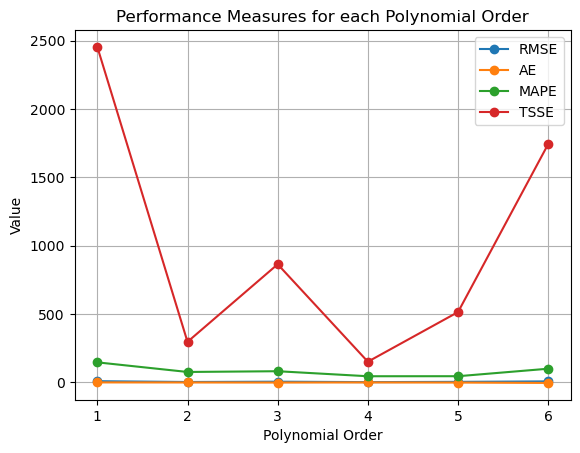

In [17]:
## write your code here, Answer 1 ##

import matplotlib.pyplot as plt

methods = [root_mean_squared_error, average_error, mean_absolute_percentage_error, total_sum_of_squared_errors]

def calculate_metrics_for_all_models(predictions, y_true, methods):
    results = {}
    for order, y_pred in predictions.items():
        metrics_values = {}
        for method in methods:
            metric_name = method.__name__
            metrics_values[metric_name] = method(y_true, y_pred)
        results[order] = metrics_values
    return results

metrics_results = calculate_metrics_for_all_models(predictions, y_val, methods)
df_metrics = pd.DataFrame(metrics_results).T

print(df_metrics)

plt.plot(df_metrics.index, df_metrics['root_mean_squared_error'], marker='o', label='RMSE')
plt.plot(df_metrics.index, df_metrics['average_error'], marker='o', label='AE')
plt.plot(df_metrics.index, df_metrics['mean_absolute_percentage_error'], marker='o', label='MAPE')
plt.plot(df_metrics.index, df_metrics['total_sum_of_squared_errors'], marker='o', label='TSSE')

plt.xlabel('Polynomial Order')
plt.ylabel('Value')
plt.title('Performance Measures for each Polynomial Order')
plt.legend()
plt.grid(True)
plt.show()

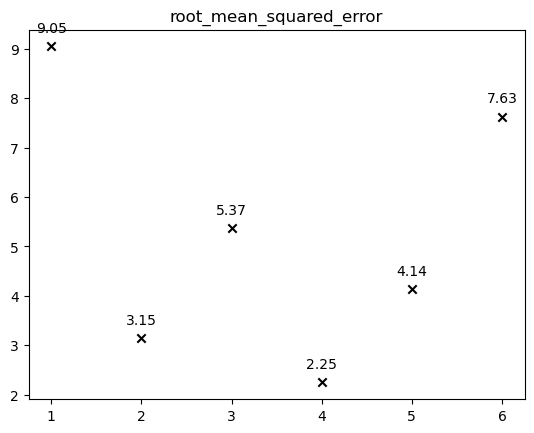

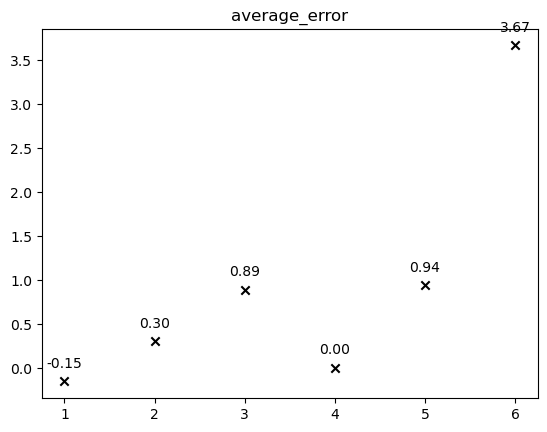

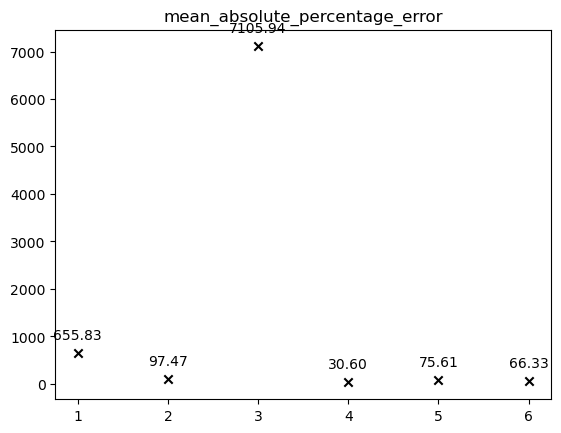

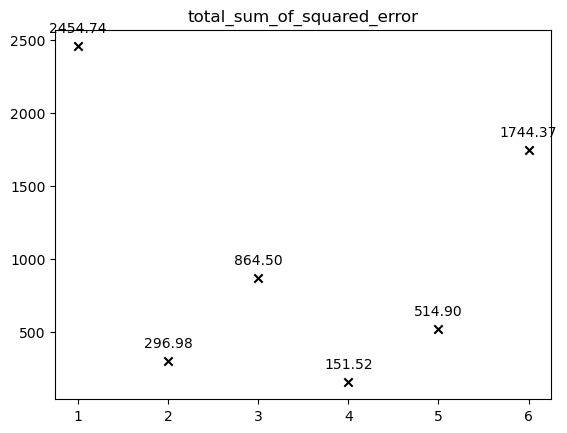

In [18]:
#### ANSWER 2 ####
import matplotlib.pyplot as plt

methods = [root_mean_squared_error, average_error, mean_absolute_percentage_error, total_sum_of_squared_errors]
method_names = ["root_mean_squared_error", "average_error", "mean_absolute_percentage_error", "total_sum_of_squared_error"]

for i, method in enumerate(methods):
    plt.figure()
    for order in [1, 2, 3, 4, 5, 6]:
        res = method(predictions[order], y_val)
        plt.scatter(order, res, marker='x', color='k')
        plt.annotate(f'{res:.2f}', (order, res), textcoords="offset points", xytext=(0,10), ha='center')        
    plt.title(method_names[i])
    plt.show()


## Section 5: Use the test set to evaluate the performance of your chosen model

### TODO: For your selected model, calculate the RMSE, Average Error and Mean Absolute Percentage Error of the test data

In [19]:
## write your code here ## 

chosen_order = 4
chosen_model = models[chosen_order]

X_test, y_test = convert_to_numpy(test_df)
y_pred_test = chosen_model.predict(X_test)


rmse_test = root_mean_squared_error(y_test, y_pred_test)
avg_error_test = average_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print(f"RMSE on Test Data: {rmse_test:.2f}")
print(f"Average Error on Test Data: {avg_error_test:.2f}")
print(f"Mean Absolute Percentage Error on Test Data: {mape_test:.2f}%")


RMSE on Test Data: 2.77
Average Error on Test Data: 0.26
Mean Absolute Percentage Error on Test Data: 19.42%
